<h2> Preprocessing </h2>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
energy_met=pd.read_csv('/content/drive/MyDrive/InfySpringboard/energy_states_consolidated.csv')
max_demand=pd.read_csv('/content/drive/MyDrive/InfySpringboard/max_states_consolidated.csv')

print("Energy Met:")
print(energy_met.head())
print("Max Demand:")
print(max_demand.head())

Energy Met:
       Date  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0  01-01-20   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
1  02-01-20   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
2  03-01-20   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
3  04-01-20   121.4    132.6      240.4   76.6  286.8         39.2  31.0   
4  05-01-20   118.0    132.1      241.9   71.1  294.2         40.1  30.1   

   J&K(UT) & Ladakh(UT)  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
0                  54.1         4.9  ...    67.9        110.2     1.9   
1                  53.2         4.8  ...    66.3        106.8     1.7   
2                  51.5         4.3  ...    65.8        107.0     2.0   
3                  53.2         4.3  ...    62.9        106.4     2.0   
4                  53.3         4.0  ...    64.0        109.3     1.5   

   Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
0             

<code>energy_met</code> contains state-wise energy met per day in MU (million units).

<code>max_demand</code> contains the daily maximum load demand state-wise in MW (megawatt).

In [ ]:
#.info() to check data types and null counts
#.describe() gives summary statistics to understand the distribution

print("Energy Met:")
print(energy_met.info())
print(energy_met.describe())
print("====================================================")
print("Max Demand:")
print(max_demand.info())
print(max_demand.describe())


Energy Met:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1600 non-null   object 
 1   Punjab                1586 non-null   float64
 2   Haryana               1586 non-null   float64
 3   Rajasthan             1586 non-null   float64
 4   Delhi                 1586 non-null   float64
 5   UP                    1586 non-null   float64
 6   Uttarakhand           1586 non-null   float64
 7   HP                    1586 non-null   float64
 8   J&K(UT) & Ladakh(UT)  1585 non-null   float64
 9   Chandigarh            1586 non-null   float64
 10  Chhattisgarh          1585 non-null   float64
 11  Gujarat               1586 non-null   float64
 12  MP                    1586 non-null   float64
 13  Maharashtra           1586 non-null   float64
 14  Goa                   1586 non-null   float64
 15  Andhra Pr

In [ ]:
print(max_demand['Date'].duplicated().sum())
print(energy_met['Date'].duplicated().sum())

0
0


In [ ]:
# Convert the 'Date' column to datetime format
energy_met['Date'] = pd.to_datetime(energy_met['Date'],format='%d-%m-%y')
max_demand['Date'] = pd.to_datetime(max_demand['Date'],format='%d-%m-%y')

#Setting the Date column as the index
energy_met.set_index('Date', inplace=True)
max_demand.set_index('Date', inplace=True)

energy_met.sort_index(inplace=True)
max_demand.sort_index(inplace=True)

print(energy_met.head())
print(energy_met.tail())
print("================================================")
print(max_demand.head())
print(max_demand.tail())

            Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
Date                                                                      
2020-01-01   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
2020-01-02   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
2020-01-03   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
2020-01-04   121.4    132.6      240.4   76.6  286.8         39.2  31.0   
2020-01-05   118.0    132.1      241.9   71.1  294.2         40.1  30.1   

            J&K(UT) & Ladakh(UT)  Chandigarh  Chhattisgarh  ...  Odisha  \
Date                                                        ...           
2020-01-01                  54.1         4.9          78.8  ...    67.9   
2020-01-02                  53.2         4.8          74.8  ...    66.3   
2020-01-03                  51.5         4.3          69.0  ...    65.8   
2020-01-04                  53.2         4.3          68.1  ...    62.9   
2020-01-05              

In [ ]:
# Handle missing values (e.g., forward fill)
energy_met.fillna(method='ffill', inplace=True)
max_demand.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(energy_met.isnull().sum())
print("======================================")
print(max_demand.isnull().sum())

Punjab                  0
Haryana                 0
Rajasthan               0
Delhi                   0
UP                      0
Uttarakhand             0
HP                      0
J&K(UT) & Ladakh(UT)    0
Chandigarh              0
Chhattisgarh            0
Gujarat                 0
MP                      0
Maharashtra             0
Goa                     0
Andhra Pradesh          0
Telangana               0
Karnataka               0
Kerala                  0
Tamil Nadu              0
Puducherry              0
Bihar                   0
DVC                     0
Jharkhand               0
Odisha                  0
West Bengal             0
Sikkim                  0
Arunachal Pradesh       0
Assam                   0
Manipur                 0
Meghalaya               0
Mizoram                 0
Nagaland                0
Tripura                 0
dtype: int64
Punjab                  0
Haryana                 0
Rajasthan               0
Delhi                   0
UP                      0

In [ ]:
for df in [energy_met,max_demand]:
  # Select numeric columns
  numeric_df = df.select_dtypes(include=[np.number])

  # Check if all columns are numeric
  all_numeric = numeric_df.shape[1] == df.shape[1]

  # Print the result
  print(f"All columns are numeric: {all_numeric}")

  # If not all columns are numeric, print the non-numeric columns
  if not all_numeric:
      non_numeric_columns = df.columns.difference(numeric_df.columns)
      print("Non-numeric columns:")
      print(non_numeric_columns)

  print("=================================================")

All columns are numeric: True
All columns are numeric: True


## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Dual-axis Line Plot:** Visualize both maximum demand and energy met over time for a specific state.

Can be seen that both Daily Maximum Demand and Energy Met follow similar trends

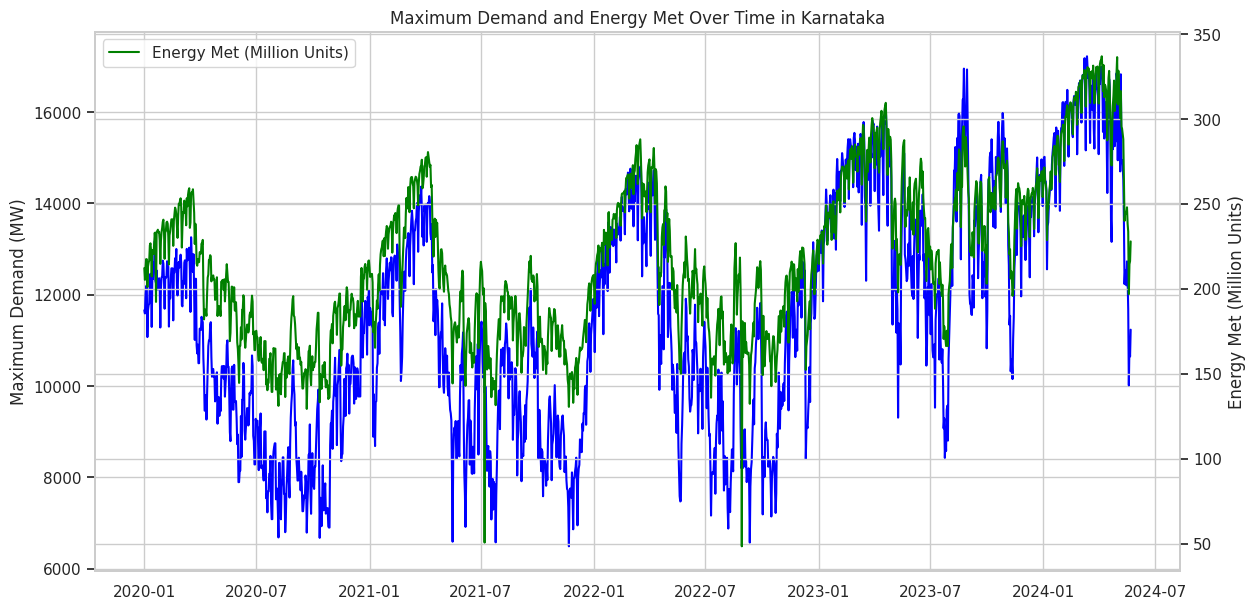

In [ ]:
state = 'Karnataka'

plt.figure(figsize=(14, 7))
plt.plot(max_demand.index, max_demand[state], label='Maximum Demand (MW)', color='blue')
plt.ylabel('Maximum Demand (MW)')
plt.twinx()
plt.plot(energy_met.index, energy_met[state], label='Energy Met (Million Units)', color='green')
plt.ylabel('Energy Met (Million Units)')
plt.title(f'Maximum Demand and Energy Met Over Time in {state}')
plt.legend(loc='upper left')
plt.show()

**Scatter Plot with Trend Line:** Show the relationship between maximum demand and energy met for a specific state.

Graph indicates that both field have a high correlation

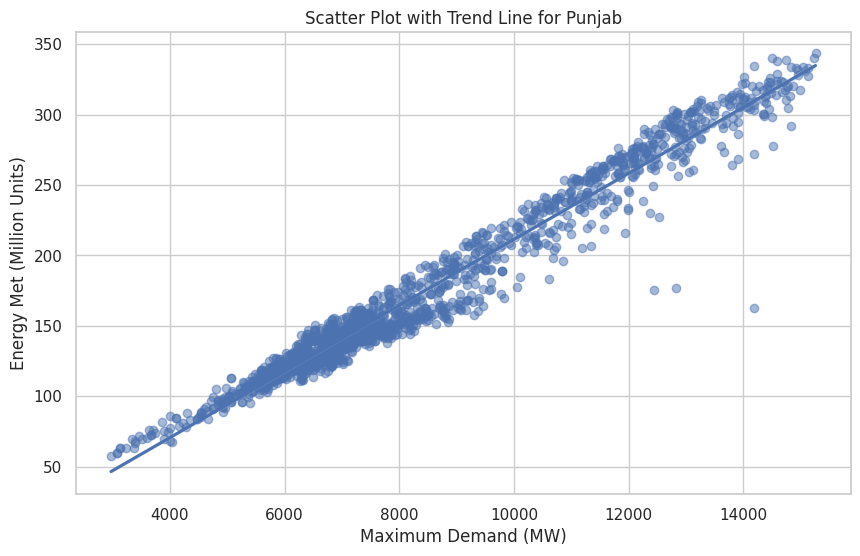

In [ ]:
state = 'Punjab'

plt.figure(figsize=(10, 6))
sns.regplot(x=max_demand[state], y=energy_met[state], scatter_kws={'alpha':0.5})
plt.xlabel('Maximum Demand (MW)')
plt.ylabel('Energy Met (Million Units)')
plt.title(f'Scatter Plot with Trend Line for {state}')
plt.show()

**Box Plot:** Compare the distribution of maximum demand and energy met across different states.

Maharashtra and UP have the highest demands.

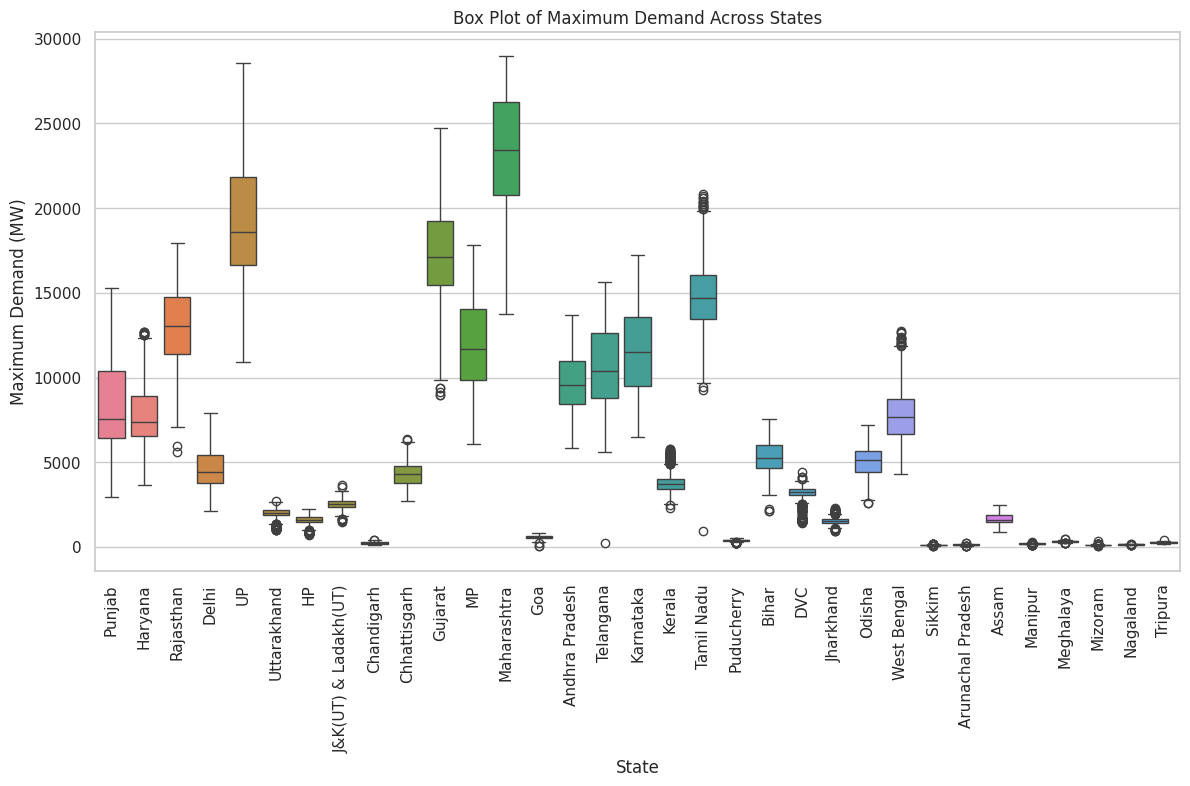

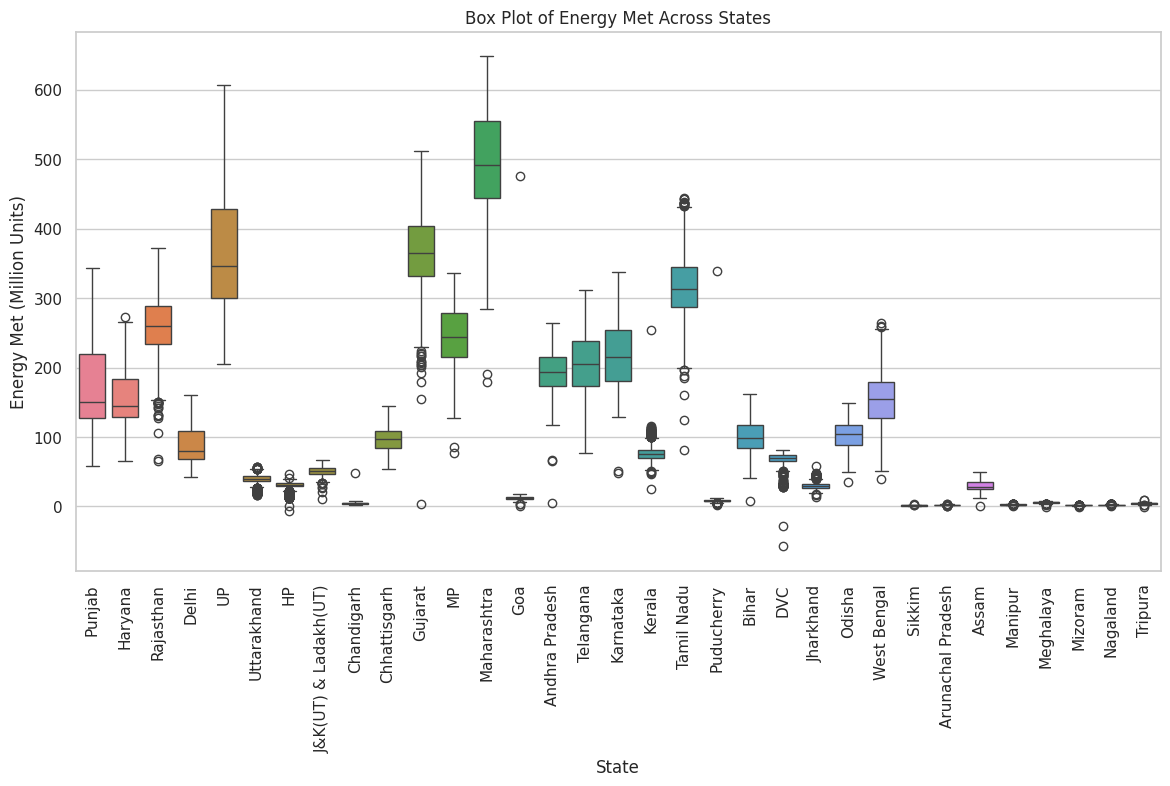

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=max_demand)
plt.xlabel('State')
plt.ylabel('Maximum Demand (MW)')
plt.title('Box Plot of Maximum Demand Across States')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=energy_met)
plt.xlabel('State')
plt.ylabel('Energy Met (Million Units)')
plt.title('Box Plot of Energy Met Across States')
plt.xticks(rotation=90)
plt.show()

**Comparative plot between different states**

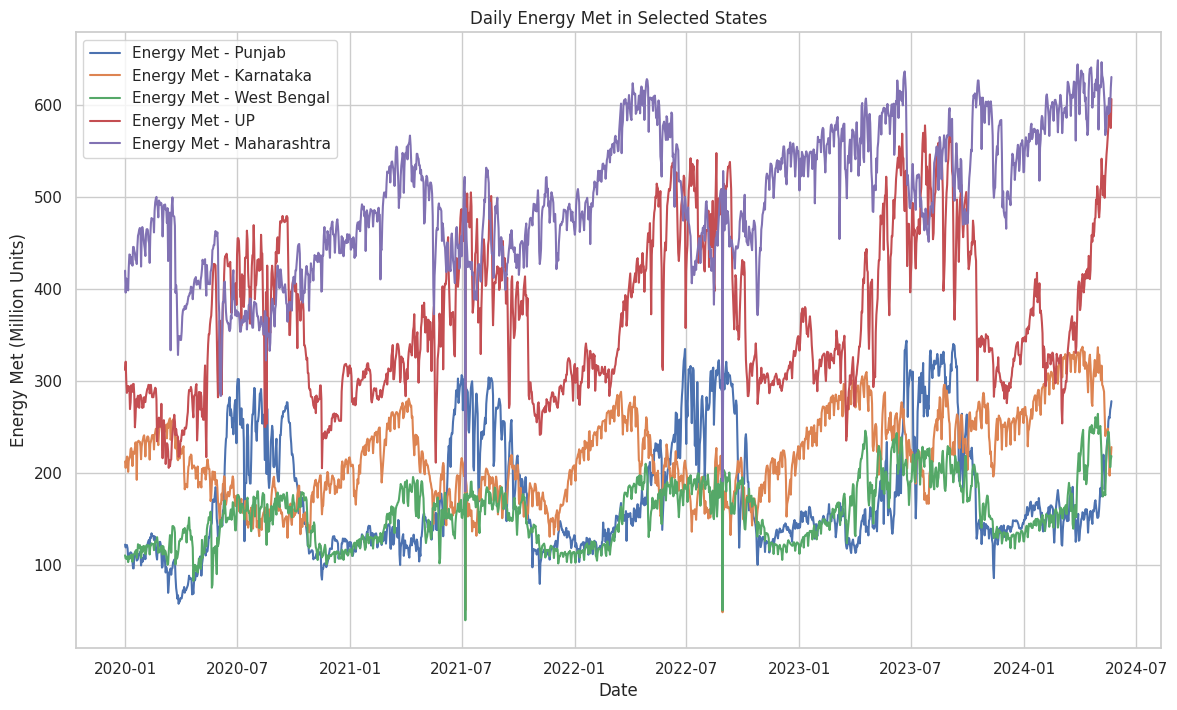

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select a few states to plot
selected_states = ['Punjab', 'Karnataka', 'West Bengal', 'UP', 'Maharashtra']

# Plot energy met in the selected states
plt.figure(figsize=(14, 8))

for state in selected_states:
    plt.plot(energy_met.index, energy_met[state], label=f'Energy Met - {state}')

plt.title('Daily Energy Met in Selected States')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()


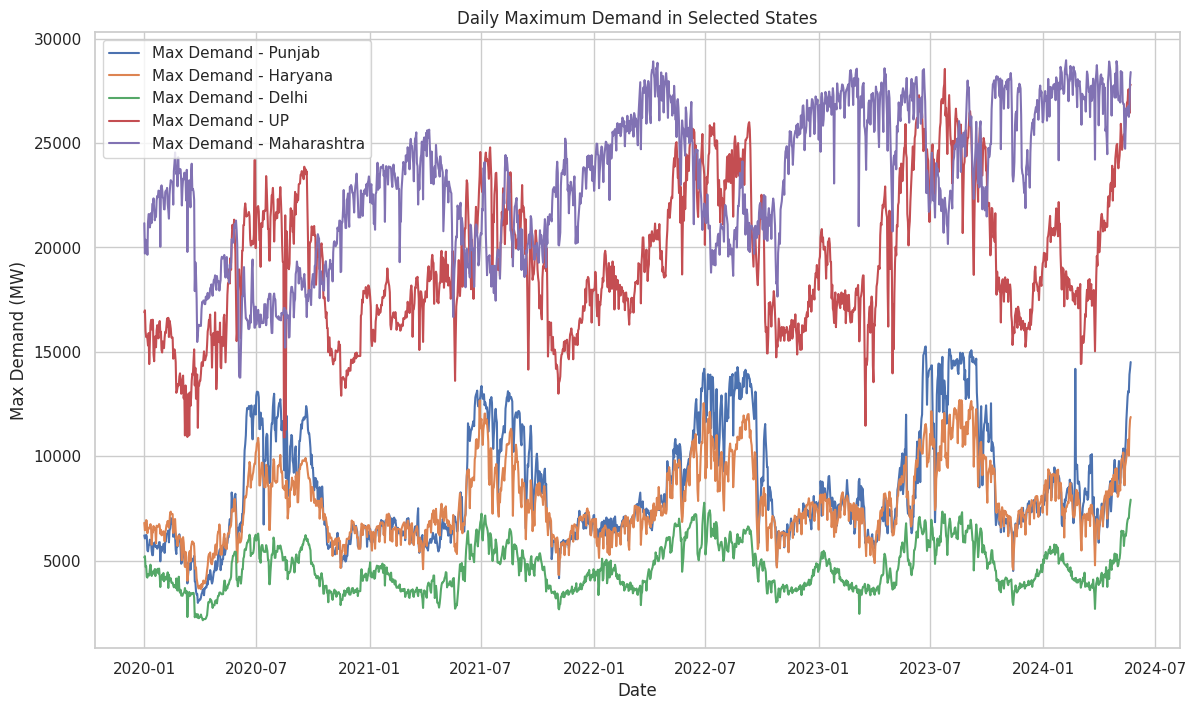

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select a few states to plot
selected_states = ['Punjab', 'Haryana', 'Delhi', 'UP', 'Maharashtra']

# Plot energy met in the selected states
plt.figure(figsize=(14, 8))

for state in selected_states:
    plt.plot(max_demand.index, max_demand[state], label=f'Max Demand - {state}')

plt.title('Daily Maximum Demand in Selected States')
plt.xlabel('Date')
plt.ylabel('Max Demand (MW)')
plt.legend()
plt.show()


Indicates a seasonal cyclic trend in the data and that the peaks are at different points for different regions in the country

## Time Series Analysis

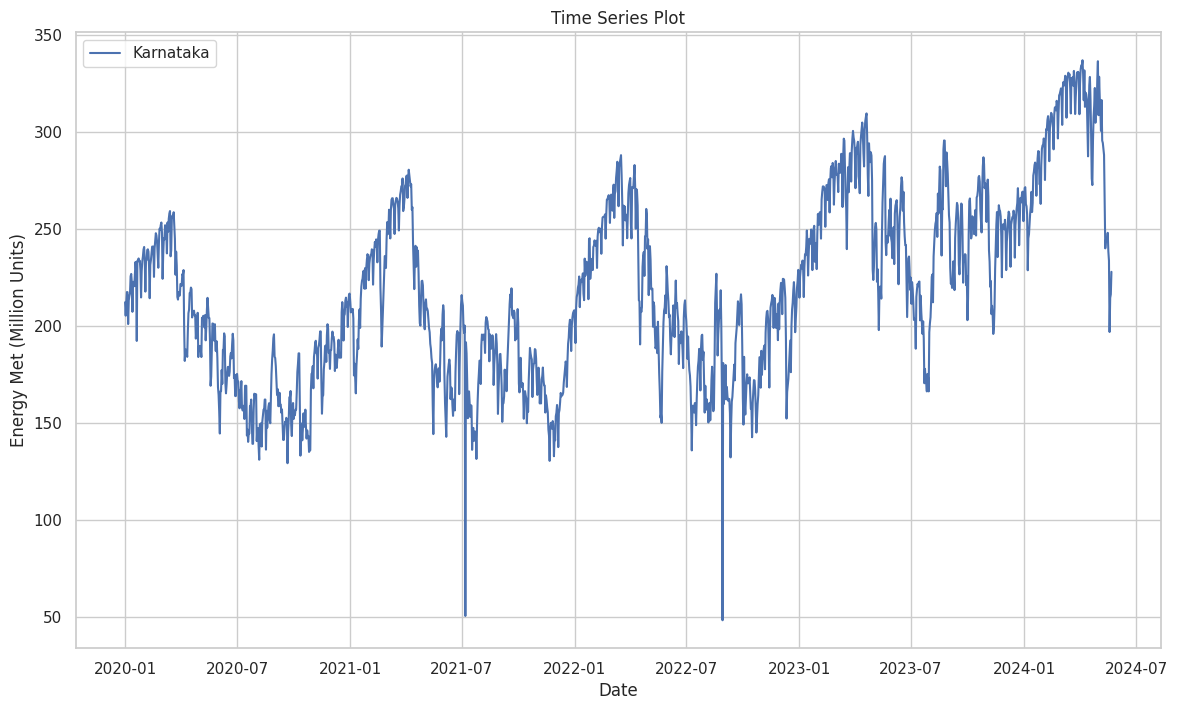

In [ ]:
state='Karnataka'
plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, energy_met[state], label=state)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()

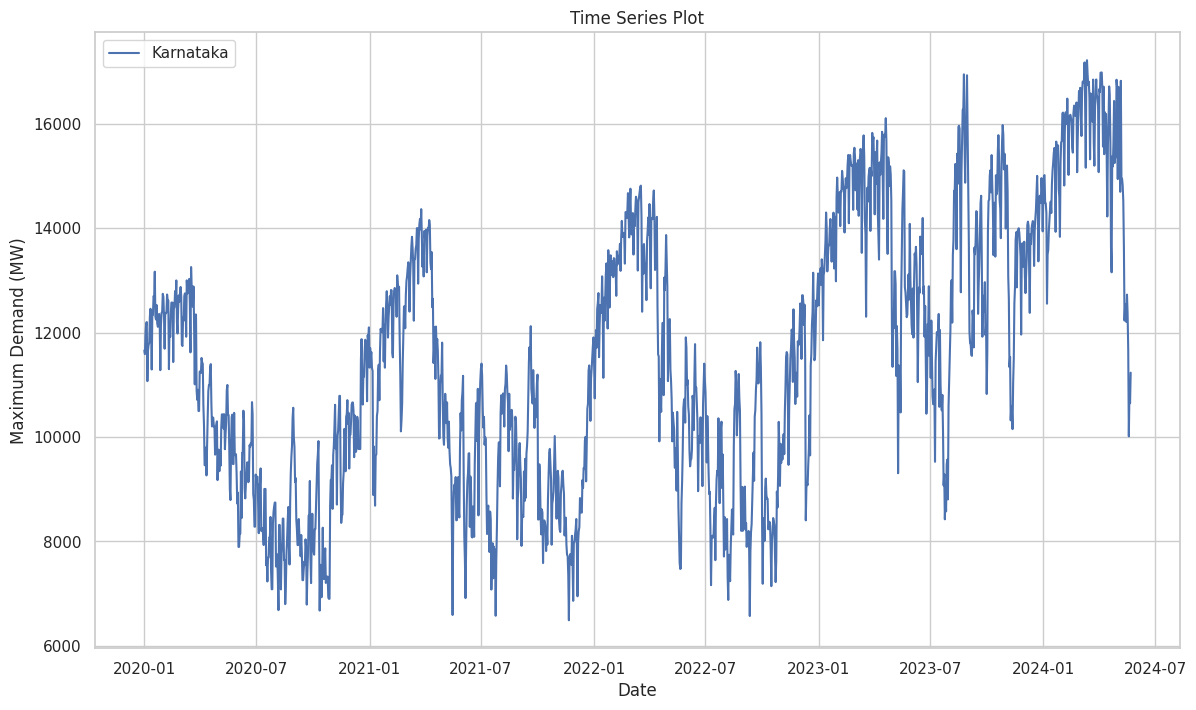

In [ ]:
state= 'Karnataka'
plt.figure(figsize=(14, 8))
plt.plot(max_demand.index, max_demand[state], label=state)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Maximum Demand (MW)')
plt.legend()
plt.show()

**Seasonal Decompose**

**Trend Analysis:** Identify long-term movements in the data.

**Seasonal Pattern Detection:** Understand periodic fluctuations and their impact.

**Noise Reduction:** Filter out random noise to better analyze underlying patterns.

<Figure size 1400x800 with 0 Axes>

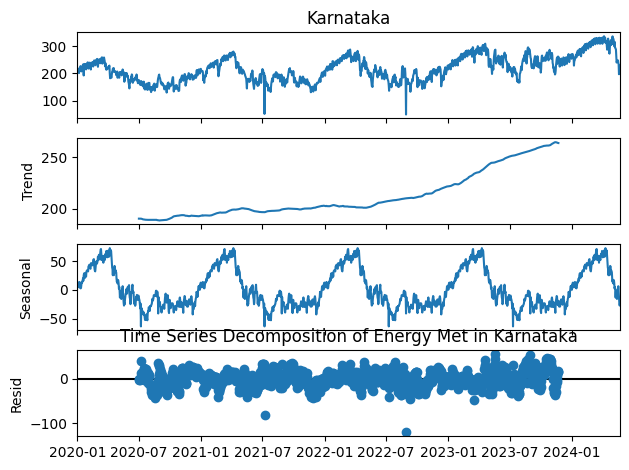

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for a specific state
state = 'Karnataka'
result = seasonal_decompose(energy_met[state], model='additive', period=365)

plt.figure(figsize=(14, 8))
result.plot()
plt.title(f'Time Series Decomposition of Energy Met in {state}')
plt.show()

<Figure size 1400x800 with 0 Axes>

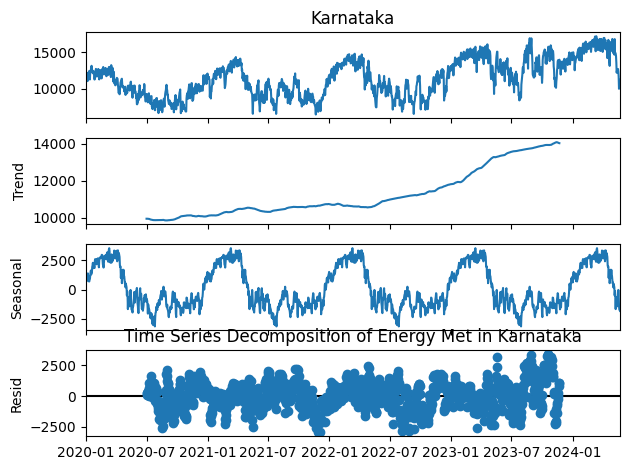

In [ ]:
# Decompose the time series for a specific state
state = 'Karnataka'
result = seasonal_decompose(max_demand[state], model='additive', period=365)

plt.figure(figsize=(14, 8))
result.plot()
plt.title(f'Time Series Decomposition of Energy Met in {state}')
plt.show()

General upward/increasing trend in data observed

**Rolling Mean and Standard Deviation**: to smooth out short-term fluctuations and highlight longer-term trends or cycles.


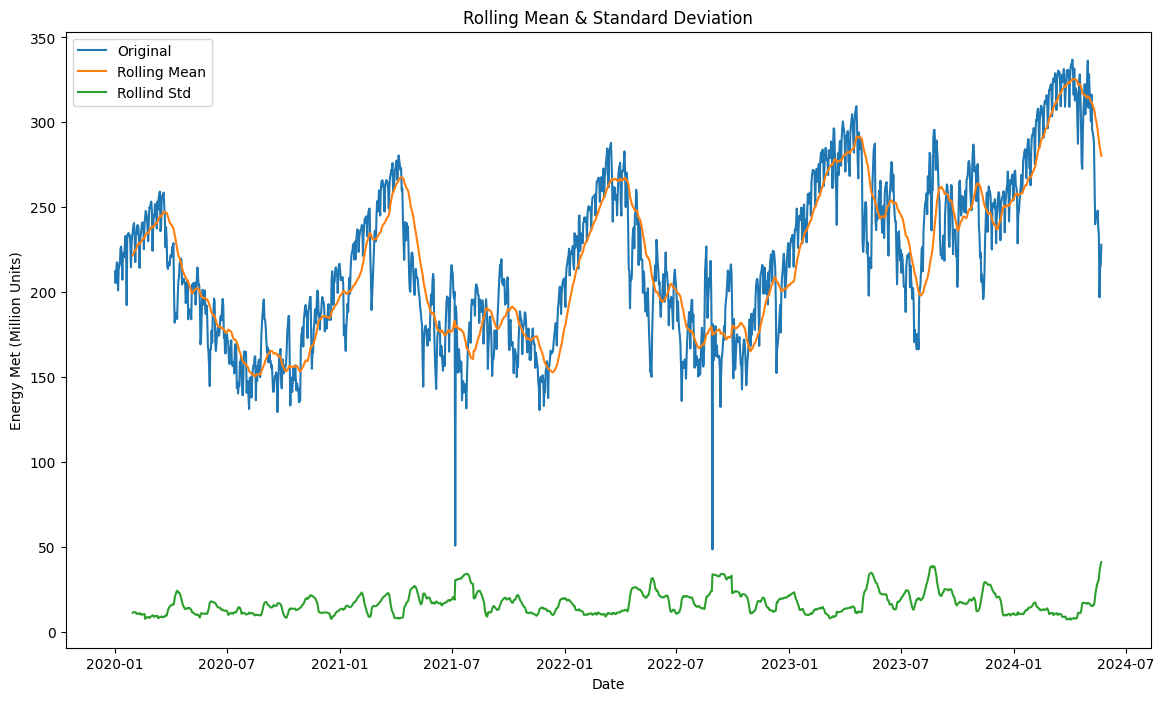

In [ ]:
state='Karnataka'

rolling_mean = energy_met[state].rolling(window=30).mean()
rolling_std = energy_met[state].rolling(window=30).std()

plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, energy_met[state], label='Original')
plt.plot(energy_met.index, rolling_mean, label='Rolling Mean')
plt.plot(energy_met.index, rolling_std, label='Rollind Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()

The random dips indicate anomalous data

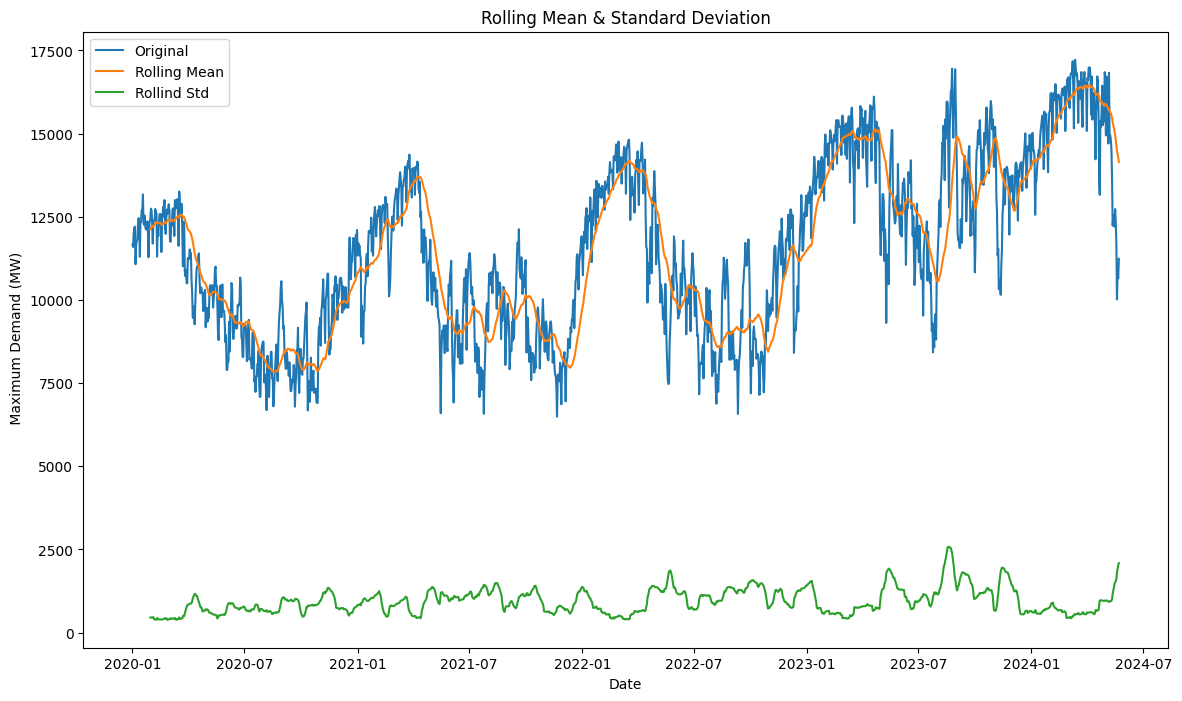

In [ ]:
state='Karnataka'

rolling_mean = max_demand[state].rolling(window=30).mean()
rolling_std = max_demand[state].rolling(window=30).std()

plt.figure(figsize=(14, 8))
plt.plot(max_demand.index, max_demand[state], label='Original')
plt.plot(max_demand.index, rolling_mean, label='Rolling Mean')
plt.plot(max_demand.index, rolling_std, label='Rollind Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel(' Maximum Demand (MW)')
plt.legend()
plt.show()

**Differencing:** used to make a time series stationary by removing trends and seasonality.

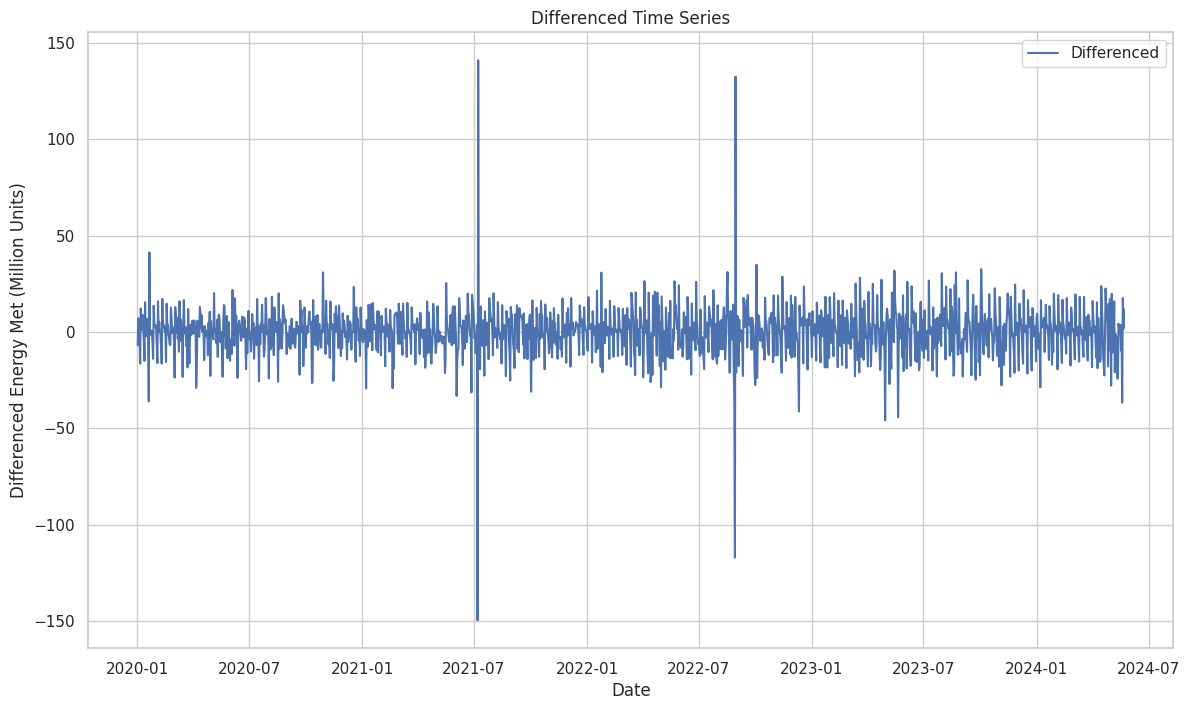

In [ ]:
state='Karnataka'
differenced = energy_met[state].diff()

plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, differenced, label='Differenced')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Met (Million Units)')
plt.legend()
plt.show()

Anomalous spikes spotted again

**Autocorrelation and Partial Autocorrelation:** to identify the relationships between lagged values and to find order for ARIMA and SARIMA models

<Figure size 1400x800 with 0 Axes>

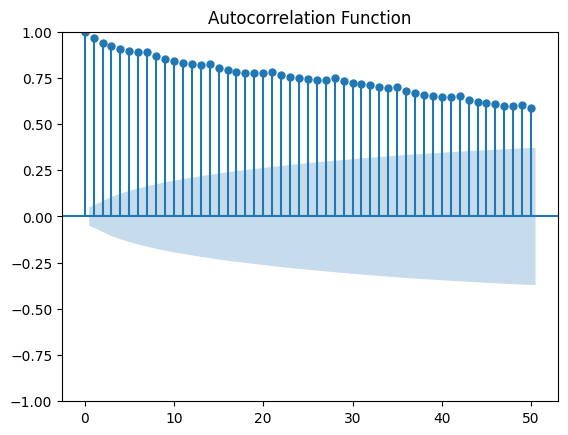

<Figure size 1400x800 with 0 Axes>

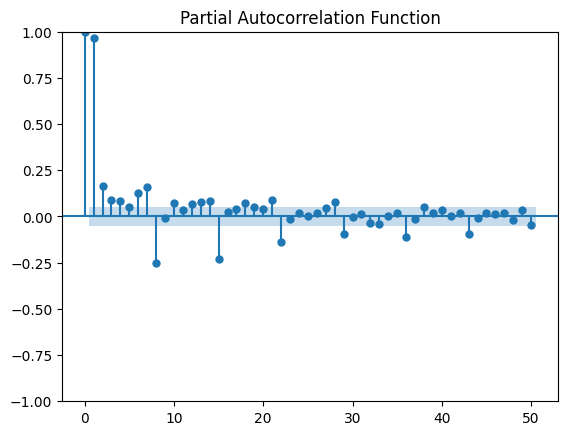

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Karnataka'
plt.figure(figsize=(14, 8))
plot_acf(energy_met[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(energy_met[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

<Figure size 1400x800 with 0 Axes>

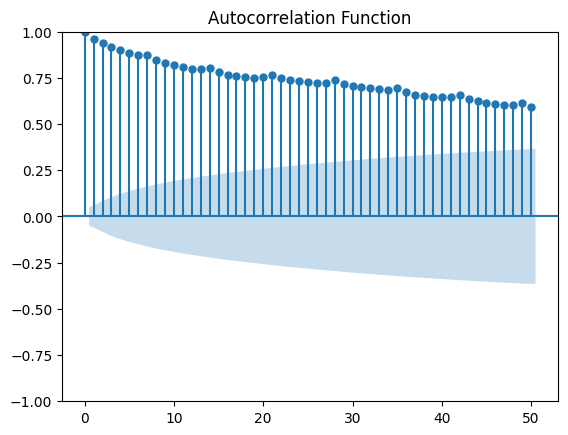

<Figure size 1400x800 with 0 Axes>

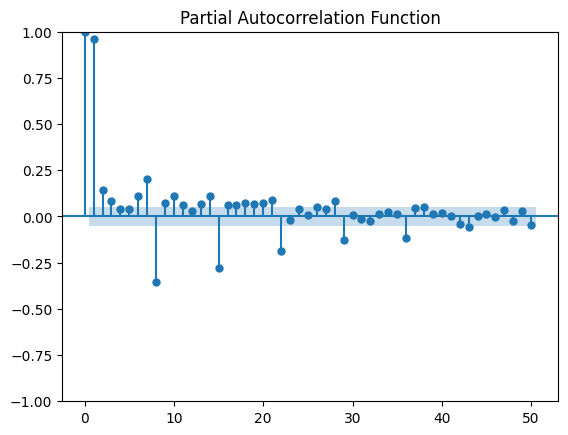

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Karnataka'
plt.figure(figsize=(14, 8))
plot_acf(max_demand[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(max_demand[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

Inferences-


*   Spikes every 8th lag - seasonal pattern with periodicity 8
*   Decay in correlation - indicates trend in data (non-seasonal component)
*   Positive and negative spikes - seasonal pattern might have alternating influences on data.




<Figure size 1400x800 with 0 Axes>

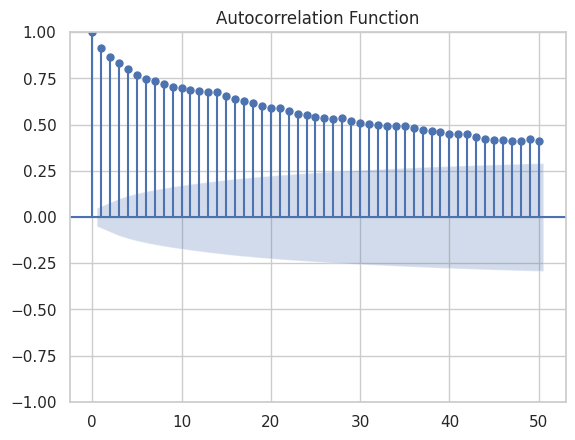

<Figure size 1400x800 with 0 Axes>

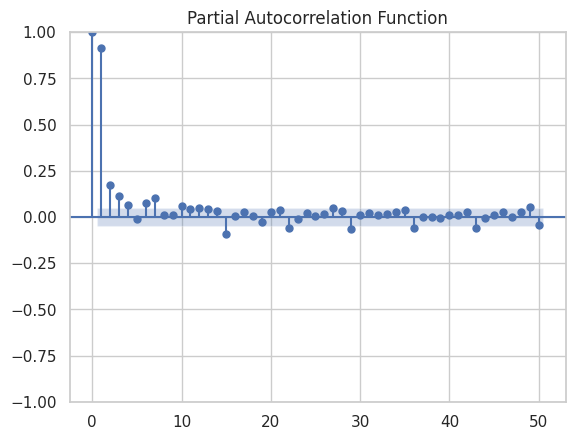

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Gujarat'
plt.figure(figsize=(14, 8))
plot_acf(energy_met[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(energy_met[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

## Modelling

**SARIMA**

Data has seasonal and non-seasonal components, estimating these parameters from the ACF and PACF plots.

p,d,q - non seasonal parameters

P,D,Q,s - seasonal parameters

where-
*   p- autoregressive order
*   q- moving average order
*   d- differencing order
*   s- seasonality


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
state='Karnataka'

# Identify seasonal parameters
seasonal_period = 12

# Select SARIMA orders
p, d, q = 1,1,1
P, D, Q = 1,1,1

# Build SARIMA model
sarima_model = SARIMAX(energy_met[state], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Fit model
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Storing the trained SARIMA model as a pickle file for later use

In [ ]:
import joblib

joblib.dump(sarima_result, 'sarima_model.pkl')

['sarima_model.pkl']

In [ ]:
from google.colab import files
files.download('sarima_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from datetime import datetime

state='Karnataka'
data=energy_met[state]

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)

# Evaluate model
predictions = sarima_result.predict(start=start_date, end=end_date, dynamic=False)
mse = mean_squared_error(data.loc[start_date:end_date], predictions)
mae = mean_absolute_error(data.loc[start_date:end_date], predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (RMSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (RMSE):", mae)

Mean Squared Error (RMSE): 89.15926913251758
Root Mean Squared Error (RMSE): 9.442418606083802
Mean Absolute Error (RMSE): 7.911004305705091


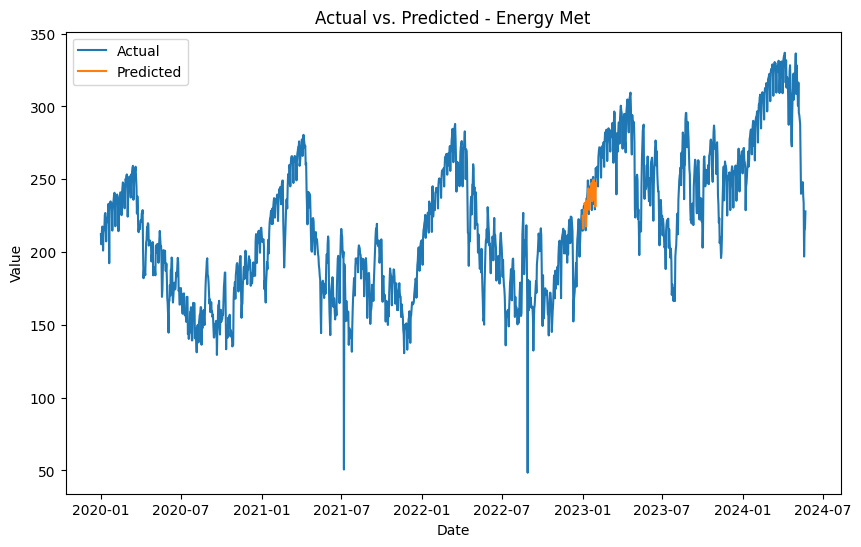

In [ ]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('Actual vs. Predicted - Energy Met')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Forecasting (if desired)
forecast_horizon = 30
forecast = sarima_result.forecast(steps=forecast_horizon)
print("Forecasted values:", forecast)

Forecasted values: 1600    228.894953
1601    227.789953
1602    230.345634
1603    230.417548
1604    231.325881
1605    230.582927
1606    231.290144
1607    230.573378
1608    230.741812
1609    229.464322
1610    231.165770
1611    230.854181
1612    229.778947
1613    229.920298
1614    230.657116
1615    230.549537
1616    230.751375
1617    229.477770
1618    231.219710
1619    230.925953
1620    229.950291
1621    230.046319
1622    230.781337
1623    230.642725
1624    230.842773
1625    229.568914
1626    231.308770
1627    231.014091
1628    230.033374
1629    230.131692
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (RMSE): 364637.9286591645
Root Mean Squared Error (RMSE): 603.8525719570667
Mean Absolute Error (RMSE): 476.6078884217671


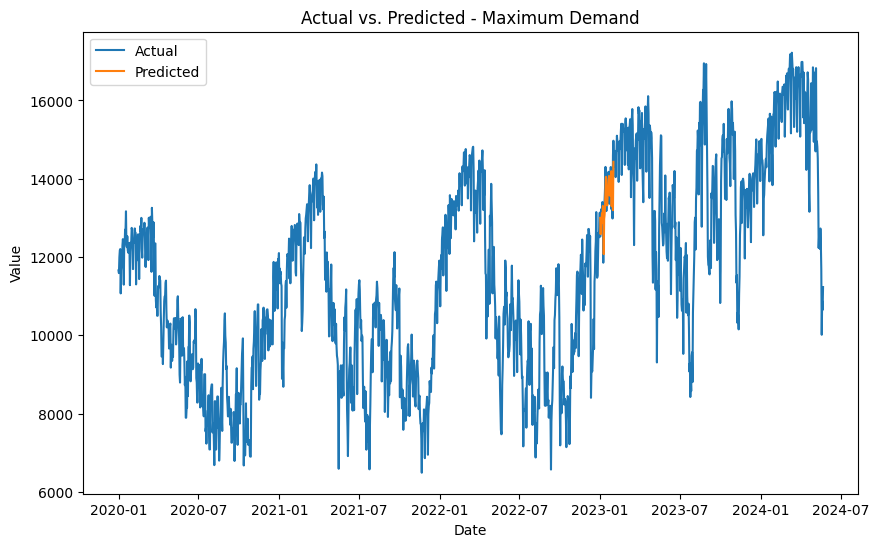

In [ ]:
state='Karnataka'
data=max_demand[state]

# Identify seasonal parameters
seasonal_period = 8

# Select SARIMA orders
p, d, q = 1,1,1
P, D, Q = 1,1,1

# Build SARIMA model
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))

# Fit model
sarima_result = sarima_model.fit()


start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)

# Evaluate model
print("===============================================")
predictions = sarima_result.predict(start=start_date, end=end_date, dynamic=False)
mse = mean_squared_error(data.loc[start_date:end_date], predictions)
mae = mean_absolute_error(data.loc[start_date:end_date], predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (RMSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (RMSE):", mae)

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('Actual vs. Predicted - Maximum Demand')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Prophet**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9fhz1gy/m59vk9md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9fhz1gy/cutgf247.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60129', 'data', 'file=/tmp/tmpc9fhz1gy/m59vk9md.json', 'init=/tmp/tmpc9fhz1gy/cutgf247.json', 'output', 'file=/tmp/tmpc9fhz1gy/prophet_modell1_vlkxm/prophet_model-20240525070216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 40.29094025866009
Mean Squared Error (MSE): 1903.4801170371095
Root Mean Squared Error (RMSE): 43.628890852703435


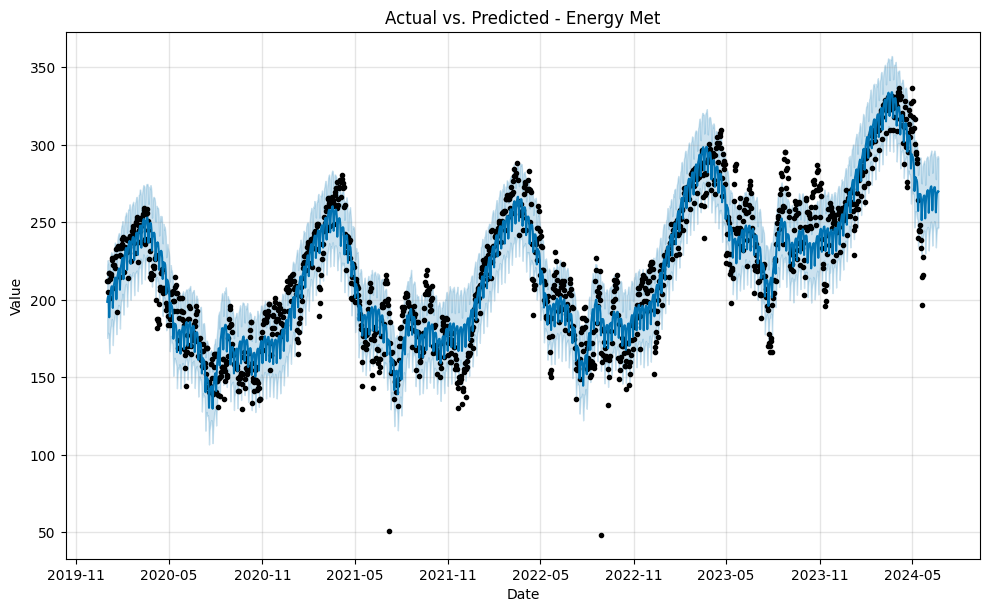

In [ ]:
df=energy_met
state='Karnataka'

# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', state: 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

forecast_horizon=30
# Make a future DataFrame
future = model.make_future_dataframe(periods=forecast_horizon, freq='D')

# Forecast
forecast = model.predict(future)

# Extract actual and predicted values
actual = prophet_df['y'].values[-forecast_horizon:]
predicted = forecast['yhat'].values[-forecast_horizon:]

# Evaluate model
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print("===========================================================")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Energy Met')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9fhz1gy/vvz8h9gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9fhz1gy/t1hfbshr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69786', 'data', 'file=/tmp/tmpc9fhz1gy/vvz8h9gi.json', 'init=/tmp/tmpc9fhz1gy/t1hfbshr.json', 'output', 'file=/tmp/tmpc9fhz1gy/prophet_modelc0bumr9h/prophet_model-20240525070238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 2061.5931406834734
Mean Squared Error (MSE): 5205561.889062467
Root Mean Squared Error (RMSE): 2281.570049124608


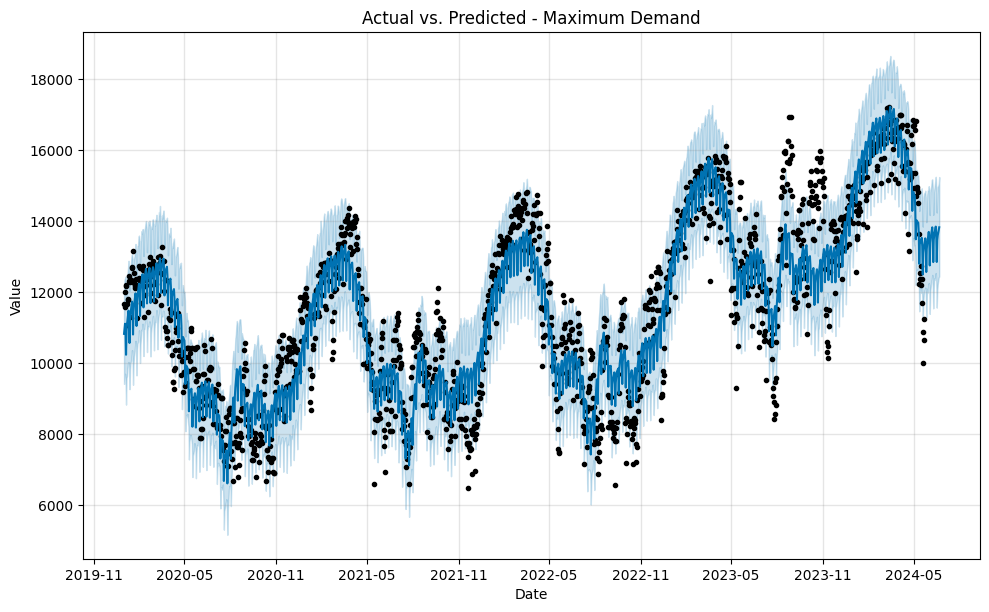

In [ ]:
df=max_demand
state='Karnataka'

# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', state: 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

forecast_horizon=30
# Make a future DataFrame
future = model.make_future_dataframe(periods=forecast_horizon, freq='D')

# Forecast
forecast = model.predict(future)

# Extract actual and predicted values
actual = prophet_df['y'].values[-forecast_horizon:]
predicted = forecast['yhat'].values[-forecast_horizon:]

# Evaluate model
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print("===========================================================")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Maximum Demand')
plt.show()

SARIMA performs better than Prophet

Predicting future data

In [ ]:
import pandas as pd
from flask import Flask, render_template, request, jsonify
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import io
import base64
import xgboost as xgb
from datetime import datetime

app = Flask(__name__)

# Load data
energy_met_df = pd.read_csv('energy_states_consolidated.csv')
max_demand_df = pd.read_csv('max_states_consolidated.csv')

# Convert the 'Date' column to datetime format
energy_met_df['Date'] = pd.to_datetime(energy_met_df['Date'],format='%d-%m-%y')
max_demand_df['Date'] = pd.to_datetime(max_demand_df['Date'],format='%d-%m-%y')

#Setting the Date column as the index
energy_met_df.set_index('Date', inplace=True)
max_demand_df.set_index('Date', inplace=True)

energy_met_df.sort_index(inplace=True)
max_demand_df.sort_index(inplace=True)

# Handle missing values (e.g., forward fill)
energy_met_df.fillna(method='ffill', inplace=True)
max_demand_df.fillna(method='ffill', inplace=True)

energy_met_trans=energy_met_df.T
max_demand_trans=max_demand_df.T


@app.route('/')
def index():
    states = energy_met_trans.index.unique()
    return render_template('old.html', states=states)

@app.route('/forecast', methods=['POST'])
def forecast():
    state = request.form['state']
    data_type = request.form['data_type']
    end_date = request.form['end_date']

    if data_type == 'energy_met':
        df = pd.DataFrame(energy_met_df[state].dropna())
        unit='MU'
        yval=min(df[state])
    else:
        df = pd.DataFrame(max_demand_df[state].dropna())
        unit='MW'
        yval=min(df[state])

    if end_date>('2024-05-22'):
        future_forecast=True
    else:
        future_forecast=False

    if future_forecast:
        def create_features(df):
            """
            Create time series features based on time series index.
            """
            df = df.copy()

            df['dayofweek'] = df.index.dayofweek
            df['quarter'] = df.index.quarter
            df['month'] = df.index.month
            df['year'] = df.index.year
            df['dayofyear'] = df.index.dayofyear
            df['dayofmonth'] = df.index.day
            df['weekofyear'] = df.index.isocalendar().week
            return df

        def add_lags(df):
            target_map = df[state].to_dict()
            df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
            df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
            df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
            return df

        # Retrain on all data
        df = create_features(df)
        df = add_lags(df)

        FEATURES = ['dayofyear', 'dayofweek', 'quarter','month', 'year',
                    'lag1','lag2','lag3']
        TARGET = state

        X_all = df[FEATURES]
        y_all = df[TARGET]

        reg = xgb.XGBRegressor(base_score=0.5,
                            booster='gbtree',
                            n_estimators=600,
                            objective='reg:linear',
                            max_depth=3,
                            learning_rate=0.01)
        reg.fit(X_all, y_all,
                eval_set=[(X_all, y_all)],
                verbose=100)

        # Create future dataframe
        future = pd.date_range('2024-05-23',end_date, freq='D')
        future_df = pd.DataFrame(index=future)
        future_df['isFuture'] = True
        df['isFuture'] = False
        df_and_future = pd.concat([df, future_df])
        df_and_future = create_features(df_and_future)
        df_and_future = add_lags(df_and_future)

        future_w_features = df_and_future.query('isFuture').copy()

        future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

        future_val=future_w_features.loc[end_date,'pred']

        plt.figure(figsize=(10,6))
        plt.plot(df.index, df[state], label='Actual')  # Use index and values for plotting
        plt.plot(future_w_features.index,future_w_features['pred'],label='Forecast')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'{data_type.replace("_", " ").title()} Forecast for {state}')
        formatted_date = datetime.strptime(end_date, '%Y-%m-%d').strftime('%d %B %Y')
        plt.text((df.index)[-500],yval,f'{formatted_date} -{future_val:0.2f} {unit}')
        plt.xticks(rotation=45)
        plt.legend()

        img = io.BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        plot_url = base64.b64encode(img.getvalue()).decode()

    else:

        future_val=df.loc[end_date,state]
        plt.figure(figsize=(10,6))
        plt.plot(df.index, df[state])
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'{data_type.replace("_", " ").title()} Data for {state}')
        formatted_date = datetime.strptime(end_date, '%Y-%m-%d').strftime('%d %B %Y')
        plt.text((df.index)[-700],yval,f'{formatted_date} -{future_val:0.2f} {unit}')
        plt.xticks(rotation=45)
        plt.legend()

        img = io.BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        plot_url = base64.b64encode(img.getvalue()).decode()

    return jsonify({'plot_url': plot_url})

if __name__ == '__main__':
    app.run()
